In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
import press_start_wrangle

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# Acquire and Prepare the Data

In [2]:
games = press_start_wrangle.acquire_and_prep()

In [3]:
games.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'combined_sales',
       ...
       'publisher_Unknown', 'publisher_Valve', 'publisher_Valve Software',
       'publisher_Video System', 'publisher_Virgin Interactive',
       'publisher_Vivendi Games',
       'publisher_Warner Bros. Interactive Entertainment',
       'publisher_Westwood Studios', 'publisher_Zoo Digital Publishing',
       'publisher_Zoo Games'],
      dtype='object', length=146)

# Split the Data

In [4]:
train, validate, test = press_start_wrangle.split_data(games)

In [5]:
train.shape, validate.shape, test.shape

((1136, 146), (488, 146), (407, 146))

In [6]:
train

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,combined_sales,...,publisher_Unknown,publisher_Valve,publisher_Valve Software,publisher_Video System,publisher_Virgin Interactive,publisher_Vivendi Games,publisher_Warner Bros. Interactive Entertainment,publisher_Westwood Studios,publisher_Zoo Digital Publishing,publisher_Zoo Games
2030,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,0.30,...,0,0,0,0,0,0,0,0,0,0
1329,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.34,...,0,0,0,0,0,0,0,0,0,0
1670,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,0.69,...,0,0,0,0,0,0,0,0,0,0
961,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,0.92,...,0,0,0,0,0,0,0,0,0,0
1228,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,0.58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,0.96,...,0,0,0,0,0,0,0,0,0,0
1330,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,0.07,...,0,0,0,0,0,0,0,0,0,0
1961,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,0.54,...,0,0,0,0,0,0,0,0,0,0
909,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.16,...,0,0,0,0,0,0,0,0,0,0


# Plot Boxplots for Qualitative Data

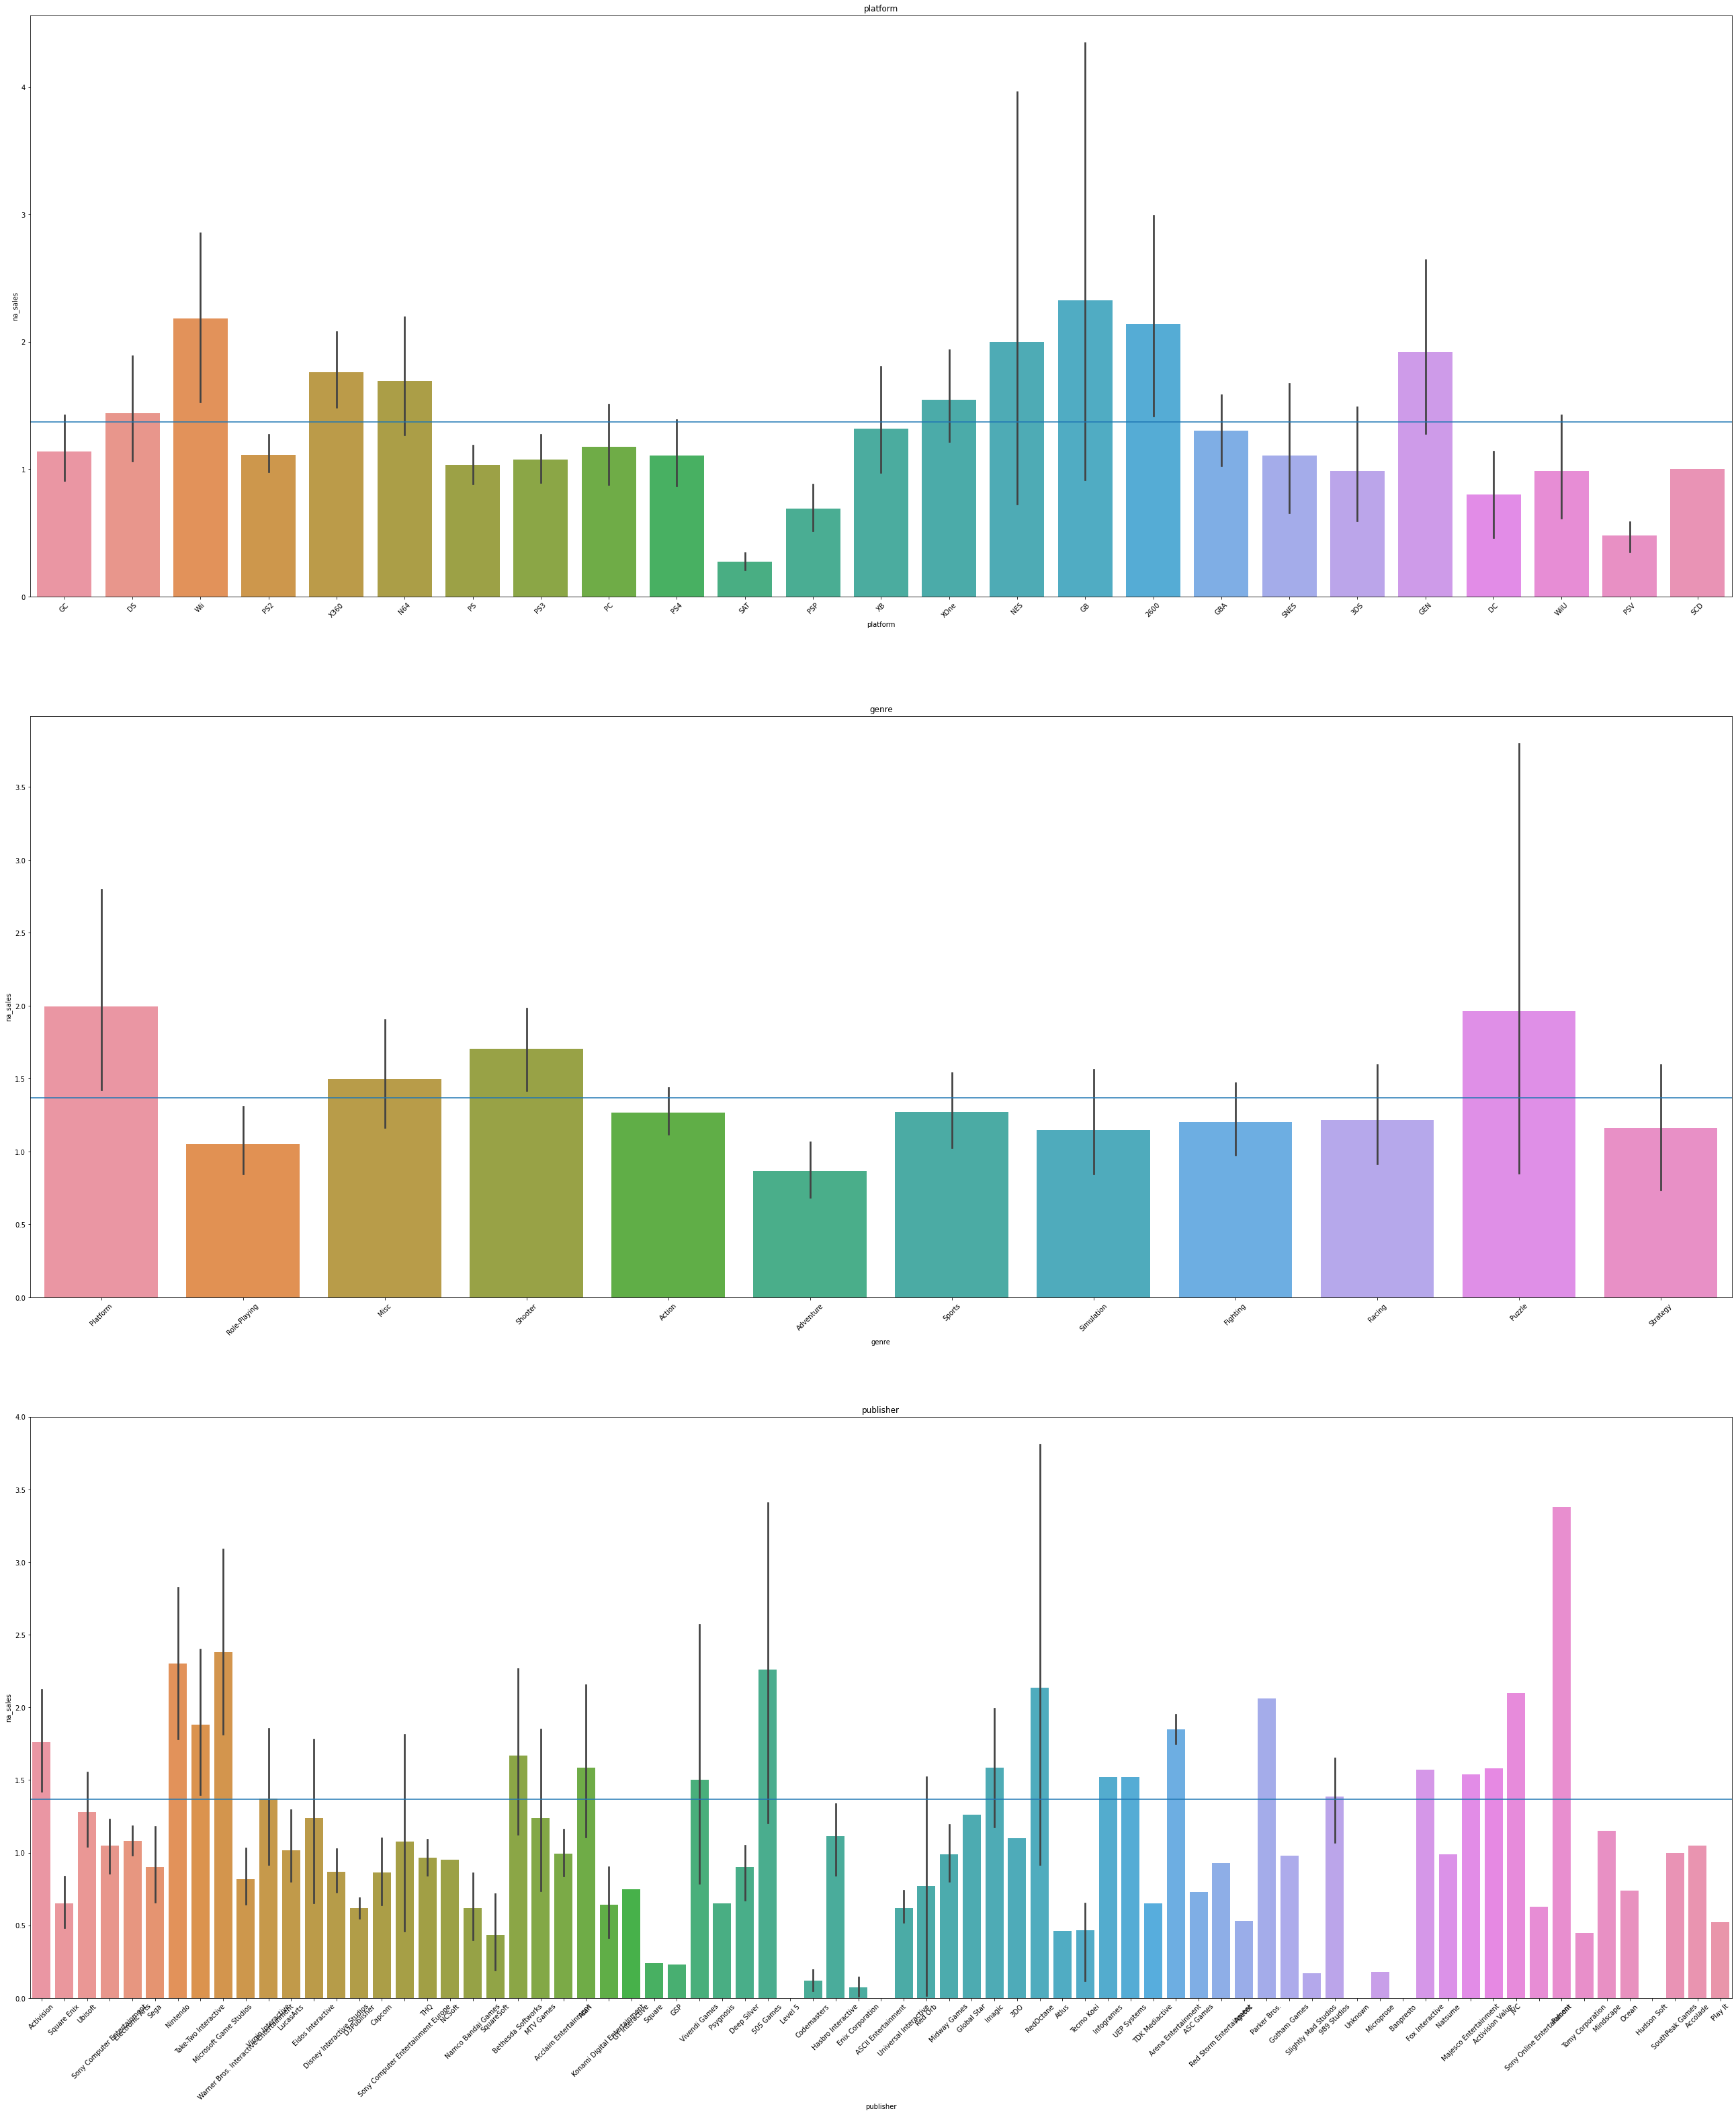

In [7]:
press_start_wrangle.qualitative_boxplot(train)

# Run Statistical Tests on Top Performing Publishers

In [8]:
press_start_wrangle.qualitative_stats_test(train)

2.112860117006087 0.018772802726588284
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.
3.5460895289171726 0.00024479672795653585
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Nintendo's average sales are greater than the population average.
1.9029818253077373 0.03124044531412377
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Take-Two Interactive's average sales are greater than the population average.
3.133044985794307 0.0018082964891023732
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Microsoft Game Studios's average sales are greater than the population average.
1.0086631127134522 0.16740457357043442
We reject the null hypothesis. There is sufficient evidence to move forward with the understa

In [9]:
train

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,combined_sales,...,publisher_Unknown,publisher_Valve,publisher_Valve Software,publisher_Video System,publisher_Virgin Interactive,publisher_Vivendi Games,publisher_Warner Bros. Interactive Entertainment,publisher_Westwood Studios,publisher_Zoo Digital Publishing,publisher_Zoo Games
2030,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,0.30,...,0,0,0,0,0,0,0,0,0,0
1329,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.34,...,0,0,0,0,0,0,0,0,0,0
1670,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,0.69,...,0,0,0,0,0,0,0,0,0,0
961,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,0.92,...,0,0,0,0,0,0,0,0,0,0
1228,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,0.58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,0.96,...,0,0,0,0,0,0,0,0,0,0
1330,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,0.07,...,0,0,0,0,0,0,0,0,0,0
1961,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,0.54,...,0,0,0,0,0,0,0,0,0,0
909,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.16,...,0,0,0,0,0,0,0,0,0,0


# Scale the Data Using Robust Scaler

In [10]:
X_train, X_validate, X_test, X_train_scaled, X_validate_scaled, X_test_scaled = press_start_wrangle.scale_data_using_robust(train, validate, test)

In [11]:
# Create variables that hold values for the target.
y_train = pd.DataFrame(train.na_sales)
y_validate = pd.DataFrame(validate.na_sales)
y_test = pd.DataFrame(test.na_sales)

# Set Baseline

In [12]:
press_start_wrangle.get_baseline(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  1.89 
Validate/Out-of-Sample:  1.73
RMSE using Median
Train/In-Sample:  1.95 
Validate/Out-of-Sample:  1.76


In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

#Initializing RFE model, with parameter to select top 10 features. 
rfe = RFE(model, 100)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)

mask = rfe.support_
rfe_features = X_train_scaled.loc[:,mask].columns.tolist()

print(rfe_features)

['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'combined_sales', 'over_five_mill', 'age_bins_middle_aged', 'age_bins_noob', 'platform_DC', 'platform_DS', 'platform_GB', 'platform_GBA', 'platform_GC', 'platform_GEN', 'platform_N64', 'platform_NES', 'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4', 'platform_PSV', 'platform_SAT', 'platform_SCD', 'platform_SNES', 'platform_WiiU', 'platform_XOne', 'genre_Fighting', 'genre_Misc', 'genre_Platform', 'genre_Racing', 'genre_Role-Playing', 'genre_Sports', 'publisher_505 Games', 'publisher_989 Studios', 'publisher_ASCII Entertainment', 'publisher_Acclaim Entertainment', 'publisher_Accolade', 'publisher_Activision', 'publisher_Activision Value', 'publisher_Agetec', 'publisher_Alchemist', 'publisher_Arena Entertainment', 'publisher_Atari', 'publisher_Atlus', 'publisher_Banpresto', 'publisher_Bethesda Softworks', 'publisher_Black Label Games', 'publisher_Capcom', 'publisher_City Interactive', 'publisher_Codemasters', 'publisher_Col

In [20]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm)**(1/2)

# predict validate
y_validate['na_sales_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.9359886657155106e-15 
Validation/Out-of-Sample:  0.23492651363619657


# Takeaway

* I just put this in, but I did not have time to evaluate it.
* My model seems to beat baseline by a significant amount, but I will need more time to verify.

**Update**
* Okay, I see where I went wrong. I fed the target variable into my model. Ooops. I need to rerun the model without the target variable.
